In [ ]:
# Section 3: Visualizing fire scars through false color

In [26]:
# Load Libraries
import os

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from pyproj import CRS

import rioxarray as rioxr
import xarray as xr

In [34]:
# ---- Import data ----

# Set root path directory
root = os.path.join('/',
                  'courses',
                  'EDS220',
                  'data',
                  'hwk4_landsat_data')

# Import landsat .nc file
fp = os.path.join(root,'landsat8-2018-01-26-sb-simplified.nc')
landsat = rioxr.open_rasterio(fp)

landsat

In [28]:
# ---- Explore data ----

# Display all columns in preview
pd.set_option("display.max.columns", None)

# Check out landsat data dimensions
print('Size of landsat dimensions: ', dict(landsat.sizes))

# Check original coordinates
print('Here are the landsat Original ', landsat.coords)

Size of landsat dimensions:  {'band': 1, 'x': 870, 'y': 731}
Here are the landsat Original  Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0


In [29]:
# ---- Drop the band dimension of the data ---- 

# Remove length 1 dimension (band) and reassign
landsat = landsat.squeeze()

# Remove coordinates associated to band dimension
landsat = landsat.drop_vars('band')

# Check dimensions of the coordinates
print(landsat.dims, landsat.coords)

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731}) Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0


In [30]:
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB ...
    green        (y, x) float64 5MB ...
    blue         (y, x) float64 5MB ...
    nir08        (y, x) float64 5MB ...
    swir22       (y, x) float64 5MB ...

<xarray.Dataset> Size: 15MB
Dimensions:      (y: 731, x: 870)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB ...
    green        (y, x) float64 5MB ...
    blue         (y, x) float64 5MB ...


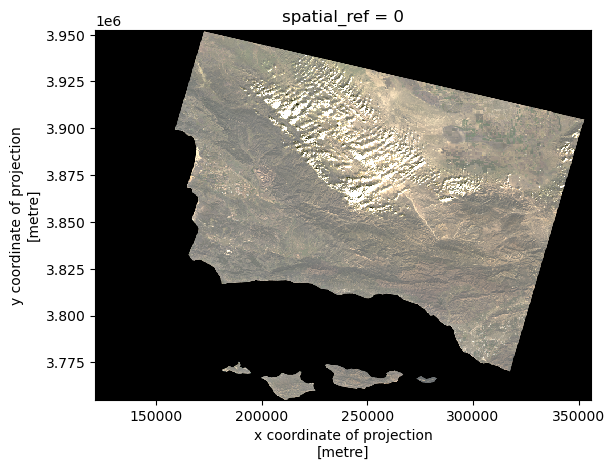

In [31]:
# ---- Create a true color image -----

# Select red, green, and blue variables
rgb = landsat[['red', 'green', 'blue']]
print(rgb)

# Convert to a DataArray using .to_array()
rgb_array = rgb.to_array()

# Plot as an RGB image
# 'robust = True' sets scale based on the 2nd and 98th percentiles to reduce influence of outliers
rgb_array.plot.imshow(robust=True) 

<xarray.Dataset> Size: 15MB
Dimensions:      (y: 731, x: 870)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    swir22       (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    nir08        (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    red          (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0


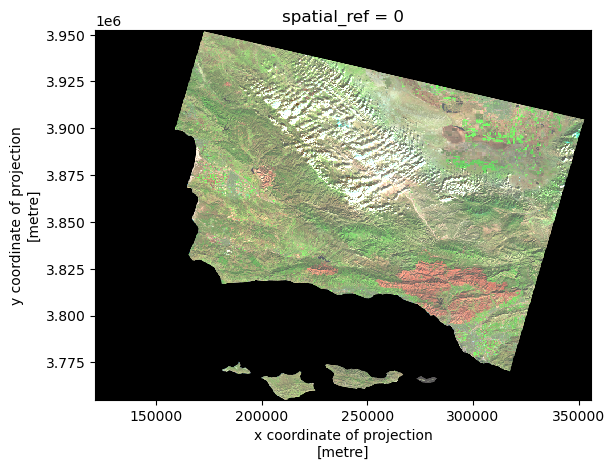

In [40]:
# ---- Create a false color image -----

# Select red, green, and blue variables
false = landsat[['swir22', 'nir08', 'red']]
print(rgb)

# Convert to a DataArray using .to_array()
false_array = rgb.to_array()

# Plot as an RGB image
# 'robust = True' sets scale based on the 2nd and 98th percentiles to reduce influence of outliers
false_array.plot.imshow(robust=True) 

In [46]:
# ---- Prepare Thomas Fire perimeter ----

# Import Thomas fire
thomas_fire = gpd.read_file("data/thomas_fire/thomas_fire.shp")

# Transform CRS
# thomas_fire = thomas_fire.to_crs('epsg:3413')

# Check if crs matches landsat data
landsat.rio.crs == thomas_fire.crs

# Reproject to landsat crs
thomas_fire = thomas_fire.to_crs(landsat.rio.crs)

# Check if crs matches landsat data
landsat.rio.crs == thomas_fire.crs

True

In [ ]:
# Define custom colors

ny_counties_utm18.plot(column='spills',
                 cmap=spills_cmap,
                 edgecolor="white",
                 ax=ax,
                 legend=True,
                legend_kwds={
        'label': "Number of Spills",
        'orientation': "vertical",
        'shrink': 0.6
    }
)


# Add data source annotation
fig.text(0.5, 0.06,
         'Data source: New York State Department of Environmental Conservation (Access Date: 11/05/24)', 
         ha='center',
         color="#A1ABAB",
         fontsize=8)

/tmp/ipykernel_2192220/3832094331.py:19: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(thomas_fire,loc='upper right', labels = ["Thomas Fire"])


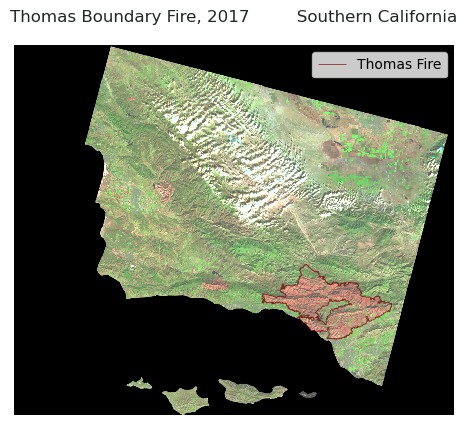

In [104]:
# Create a map of Thomas Fire # Acreage is 28171
# Make sure aspect ratio is right landsat/landsat

fig, ax = plt.subplots()

false_array.plot.imshow(robust=True) 

thomas_fire.boundary.plot(ax=ax,
                color = "#780B12",
                linewidth = 0.6,
                alpha = 0.8)

ax.set_title('Thomas Boundary Fire, 2017         Southern California',
            color="#222626", 
            fontsize=12)

ax.axis('off')

plt.legend(thomas_fire,loc='upper right', labels = ["Thomas Fire"])

plt.show()

This map shows the burn perimeter, outlined in dark red for the Thomas Fire which occured in 2017. The boundary is overlayed onto a false color satellite image of the region, combining short-wave infrared (SWIR), near-infrared (NIR), and red bands to highlight the burn scare in light red. The Thomas Fire, at the time that it burned, was California's largest wildfire in modern history, with a burn scar that surpassed 273,400 acres.